# Centrality Measures - Part1
###### Centrality Measures analyze the role of each vertex (node) in the network. There are many measures and some of them, depending on the network topology, have a high correlation.

###### This notebook provides a visual representation of some measures in six different networks topology.

###### The sort description of each measure are taken from this paper: Consistency and differences between centrality measures across distinct classes of networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

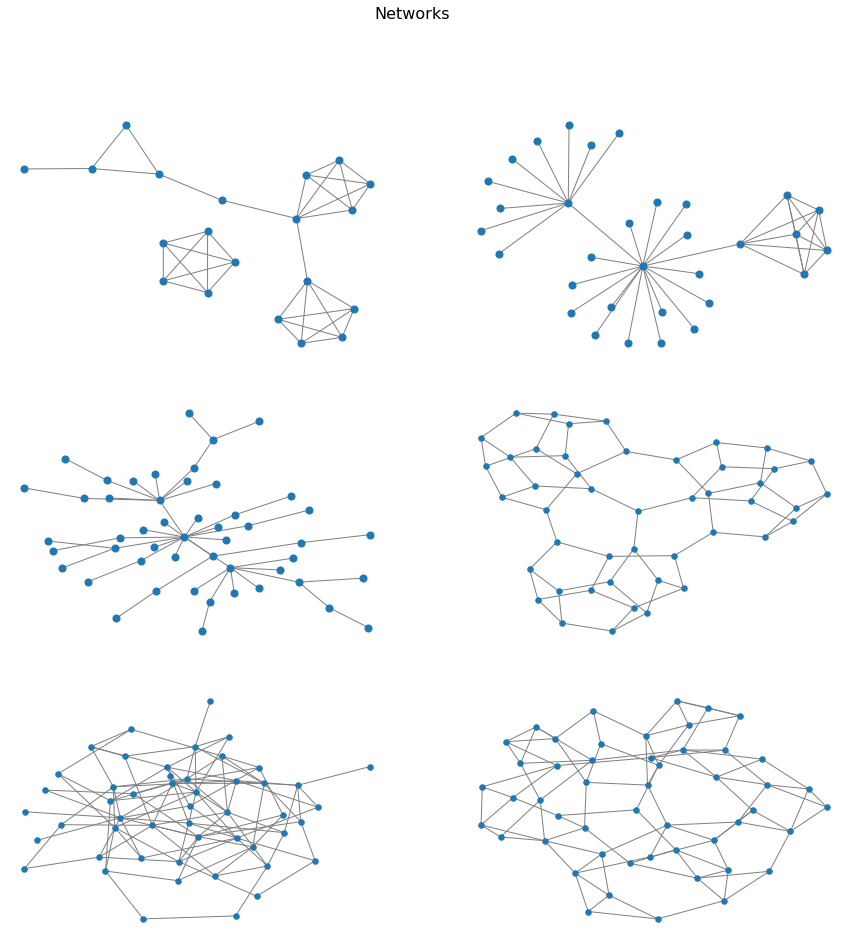

In [2]:
visualNetworks = {}
G = nx.lollipop_graph(5,5)
G = nx.disjoint_union(G, nx.complete_graph(range(10,15)))
G = nx.disjoint_union(G, nx.complete_graph(range(15,20)))
G.add_edges_from([(4,5),(6,8),(6,7),(4,19)])
visualNetworks["network1"] = G

G = nx.complete_graph(range(0,6))
nx.add_star(G, range(6,16))
nx.add_star(G, range(16,32))
G.add_edges_from([(16,6),(16,0)])
visualNetworks["network2"]=G
visualNetworks["network3"]=nx.barabasi_albert_graph(50,1)
visualNetworks["network4"] = nx.tutte_graph() 
visualNetworks["network5"]=nx.erdos_renyi_graph(50,0.08)
visualNetworks["network6"]=nx.watts_strogatz_graph(50,4,0.2)
fig, ax = plt.subplots(3,2,figsize=(15, 15))
fig.suptitle("Networks", fontsize=16)

plt.sca(ax[0,0])
ax[0,0] = nx.draw_kamada_kawai(visualNetworks["network1"],edge_color='gray',with_labels=0, node_size=50)
plt.sca(ax[0,1])
ax[0,1] = nx.draw_kamada_kawai(visualNetworks["network2"],edge_color='gray',with_labels=0, node_size=50)
plt.sca(ax[1,0])
ax[1,0] = nx.draw_kamada_kawai(visualNetworks["network3"],edge_color='gray',with_labels=0, node_size=50)
plt.sca(ax[1,1])
ax[1,1] = nx.draw_kamada_kawai(visualNetworks["network4"],edge_color='gray',with_labels=0, node_size=30)
plt.sca(ax[2,0])
ax[2,0] = nx.draw_kamada_kawai(visualNetworks["network5"],edge_color='gray',with_labels=0, node_size=30)
plt.sca(ax[2,1])
ax[2,1] = nx.draw_kamada_kawai(visualNetworks["network6"],edge_color='gray',with_labels=0, node_size=30)

plt.show()

In [3]:
def plotVisualMeasures(networks,mapping,name,description):
    plotLines=3
    plotCol=2
    fig, ax = plt.subplots(plotLines,plotCol,figsize=(15, 15))
    fig.suptitle(name+'\n'+description, fontsize=16)
    line=0
    col=0
    for rede in networks:
        #Some measures only works with 1 connect component (CC).Here we check de number of CC and get the Largest (LCC)
        if(len(networks[rede])!=len(mapping[rede])):
            redeAtual = networks[rede].subgraph(max(nx.connected_components(networks[rede]), key=len))
        else:
            redeAtual = networks[rede]

        measure = [round(mapping[rede][t],15) if mapping[rede][t]>0 else mapping[rede][t] for t in mapping[rede]]
                
        label ={}
        for k in mapping[rede].items():
            if k[1]>0:
                label[k[0]]=round(k[1],2)
            else:
                label[k[0]]=k[1]

        vmin = min(measure)
        vmax = max(measure)
        cmap = plt.cm.Wistia
        plt.sca(ax[line,col])
        pos = nx.kamada_kawai_layout(redeAtual) 
        ax[line,col] = nx.draw(redeAtual,pos=pos, labels=label,edge_color='gray',with_labels=True, node_size=200,font_size=8,node_color=measure,cmap=cmap, vmin=vmin, vmax=vmax)

        col+=1
        if(col==plotCol):
            col=0
            line+=1
#     plt.tight_layout()
#     plt.savefig(name+'.png',dpi=140)
#     plt.close()
    plt.show()

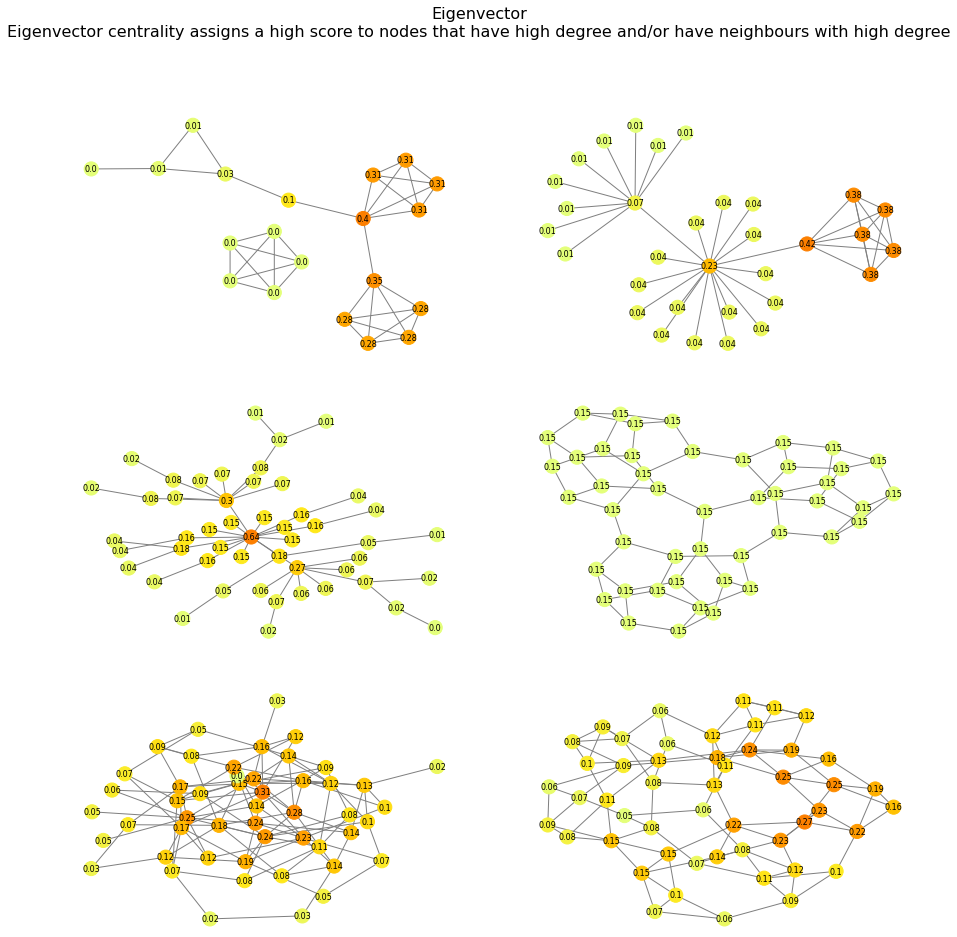

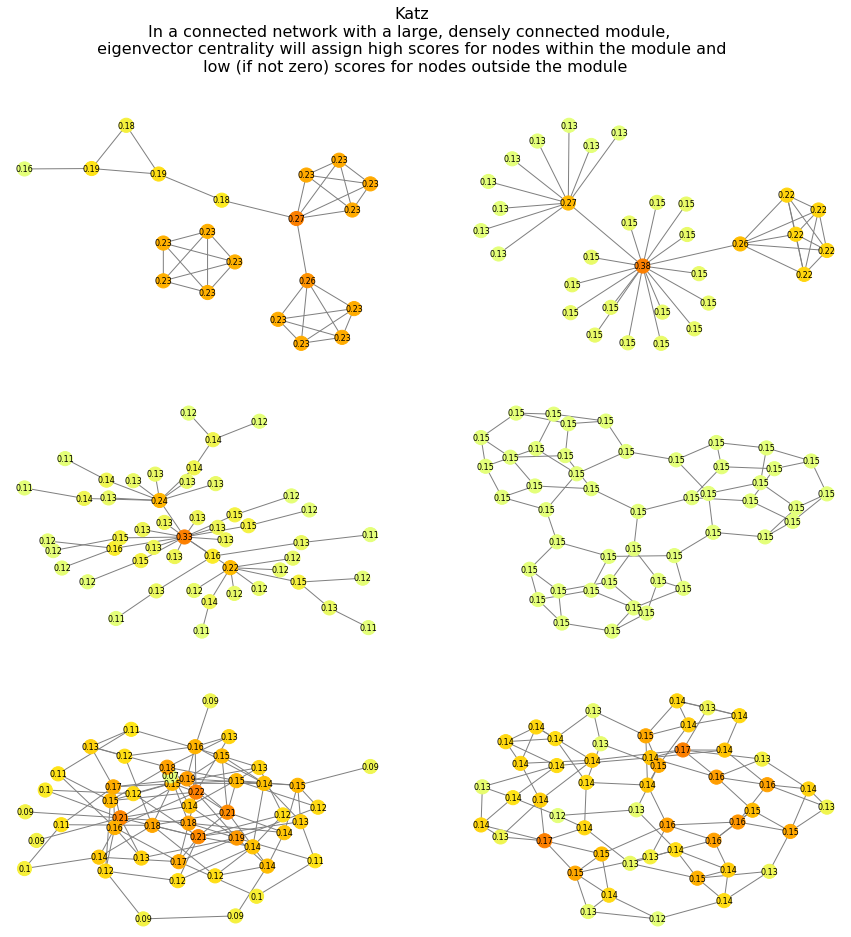

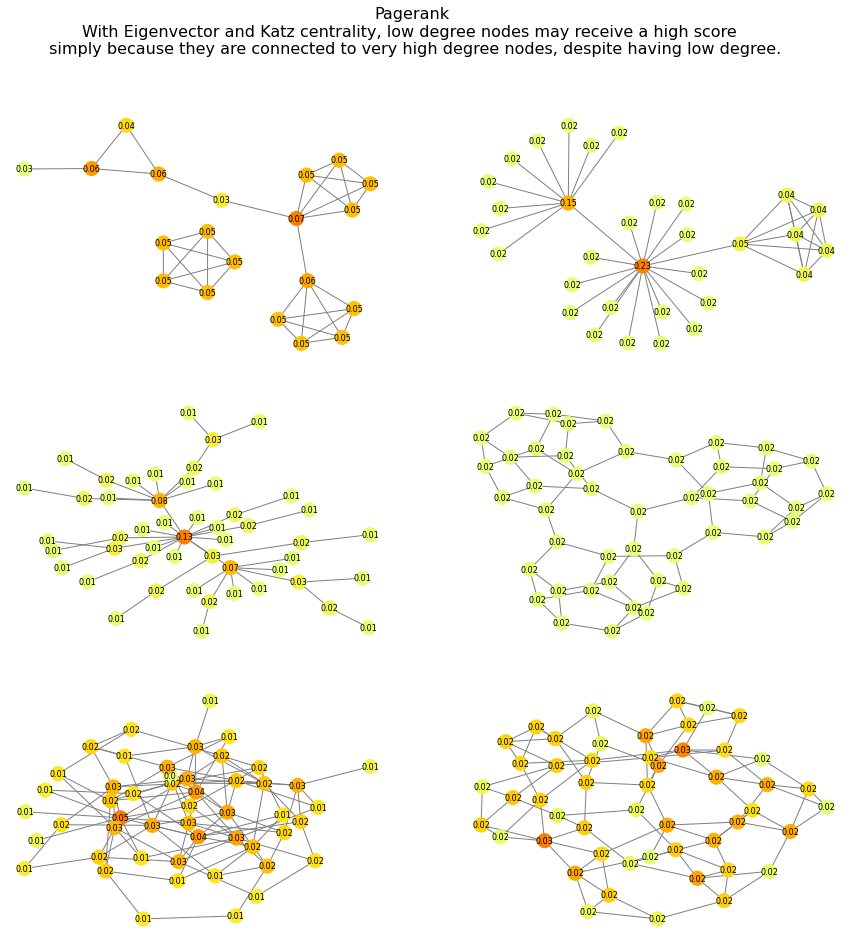

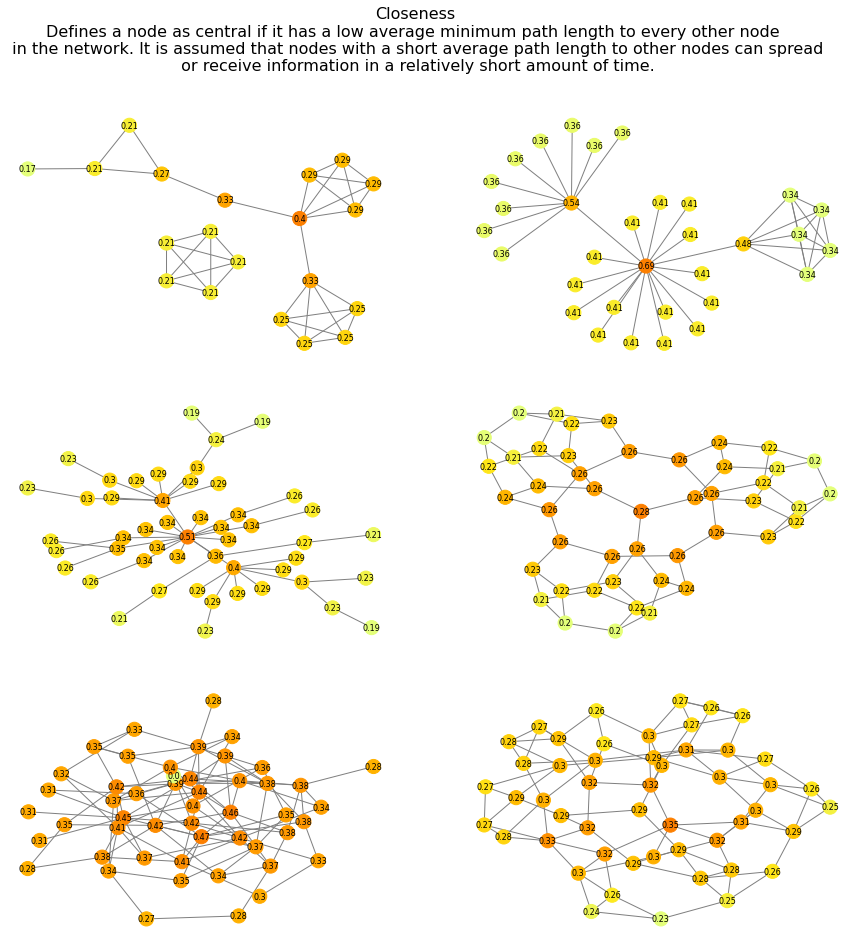

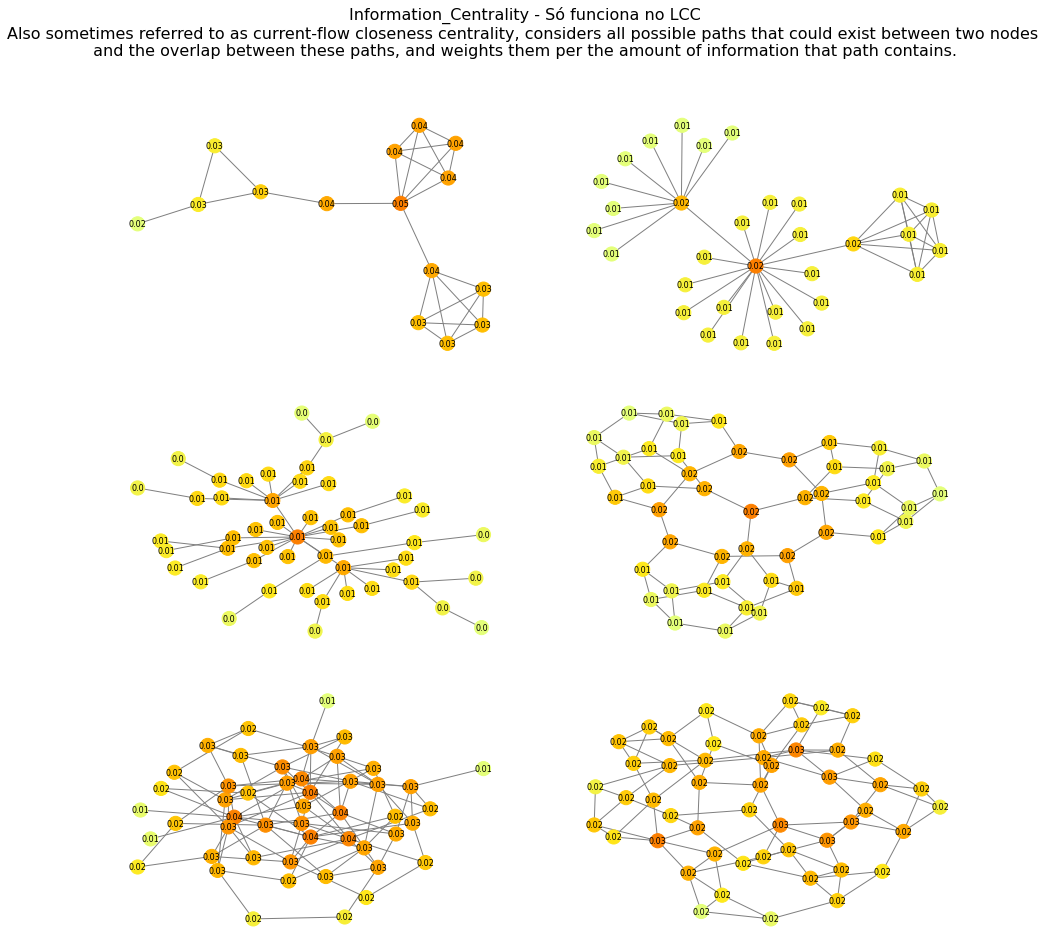

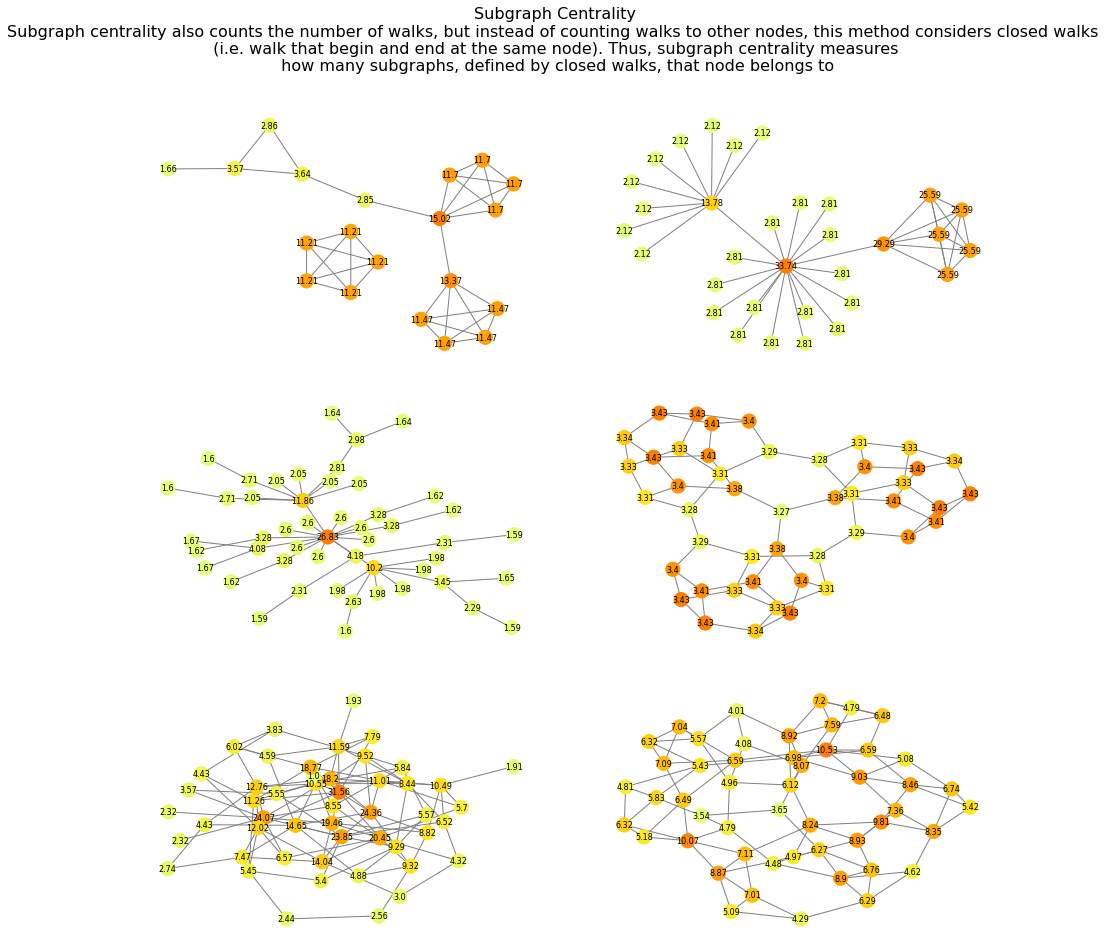

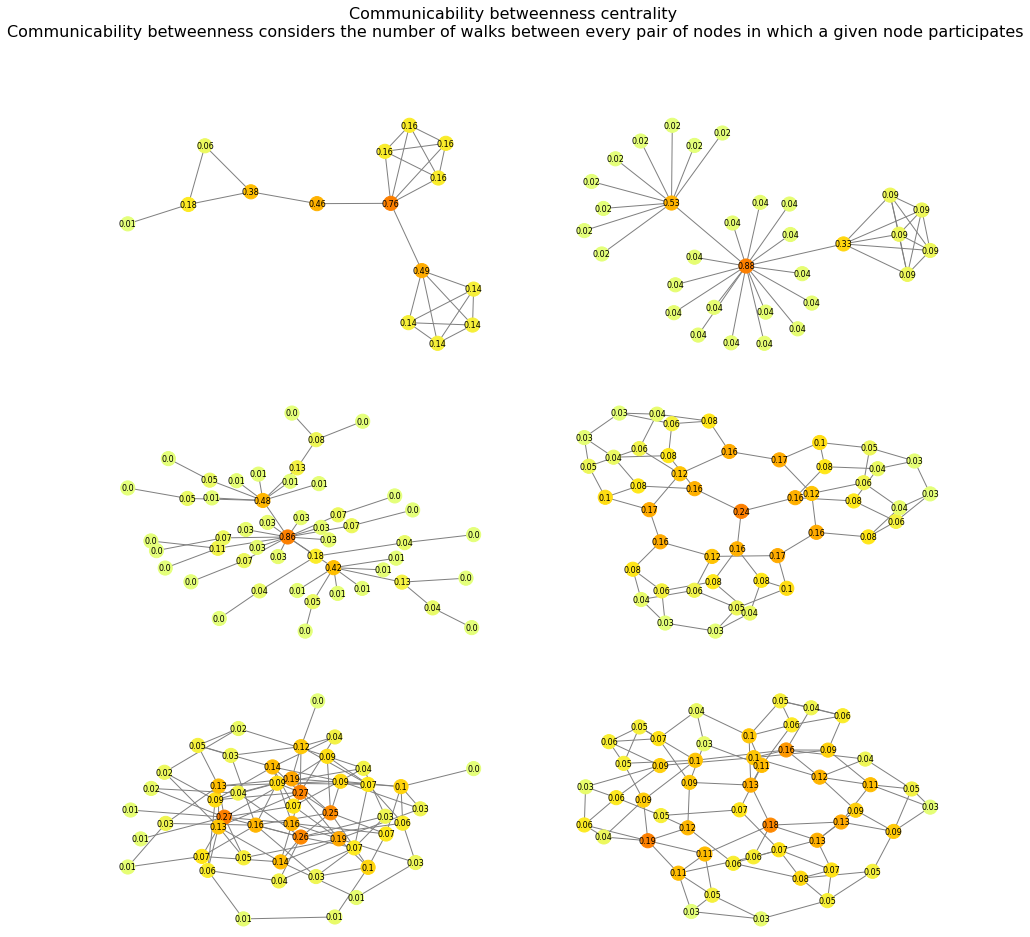

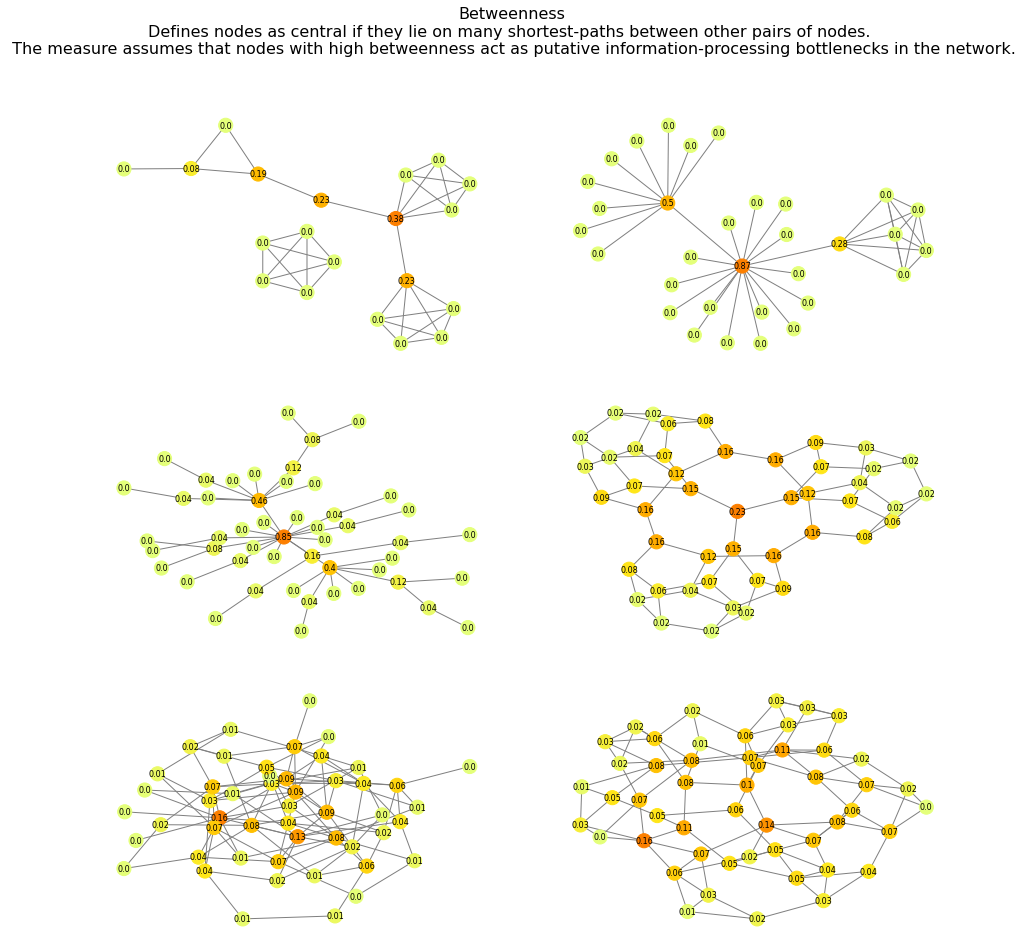

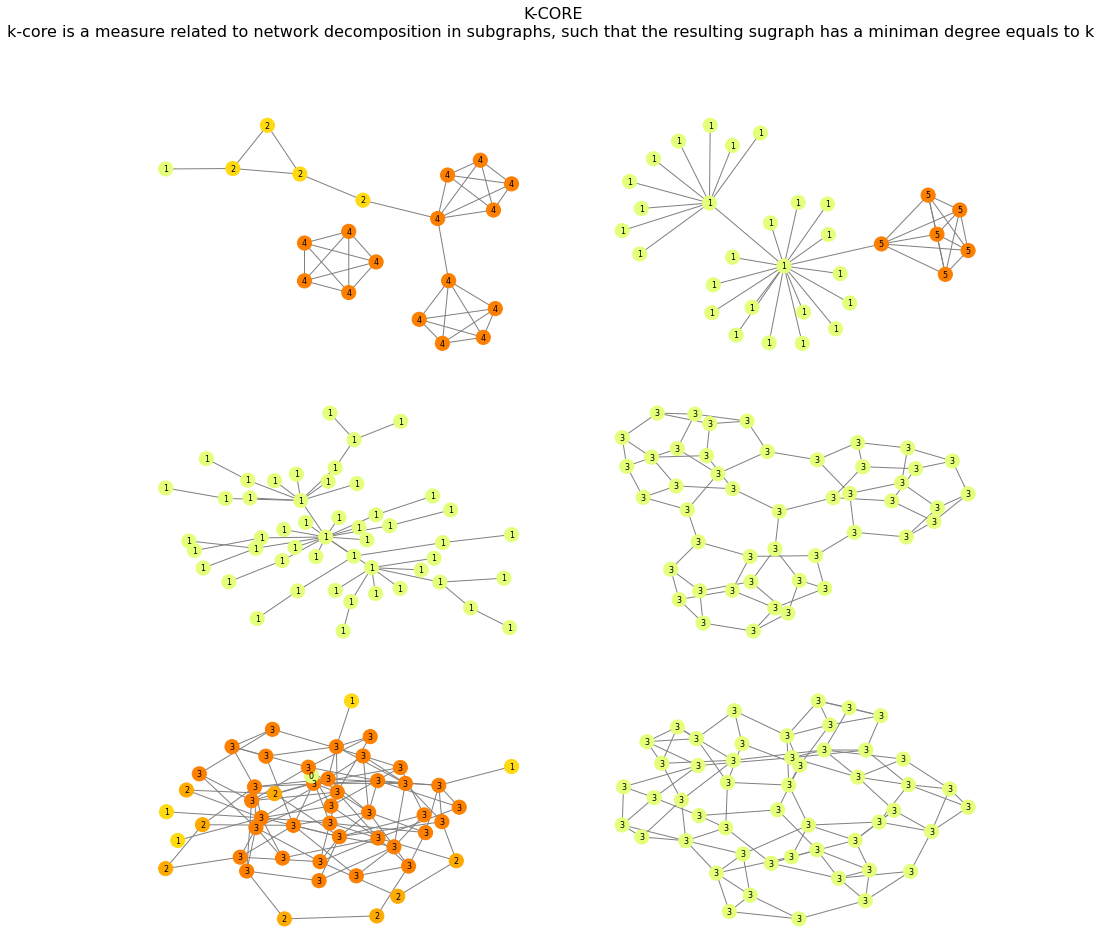

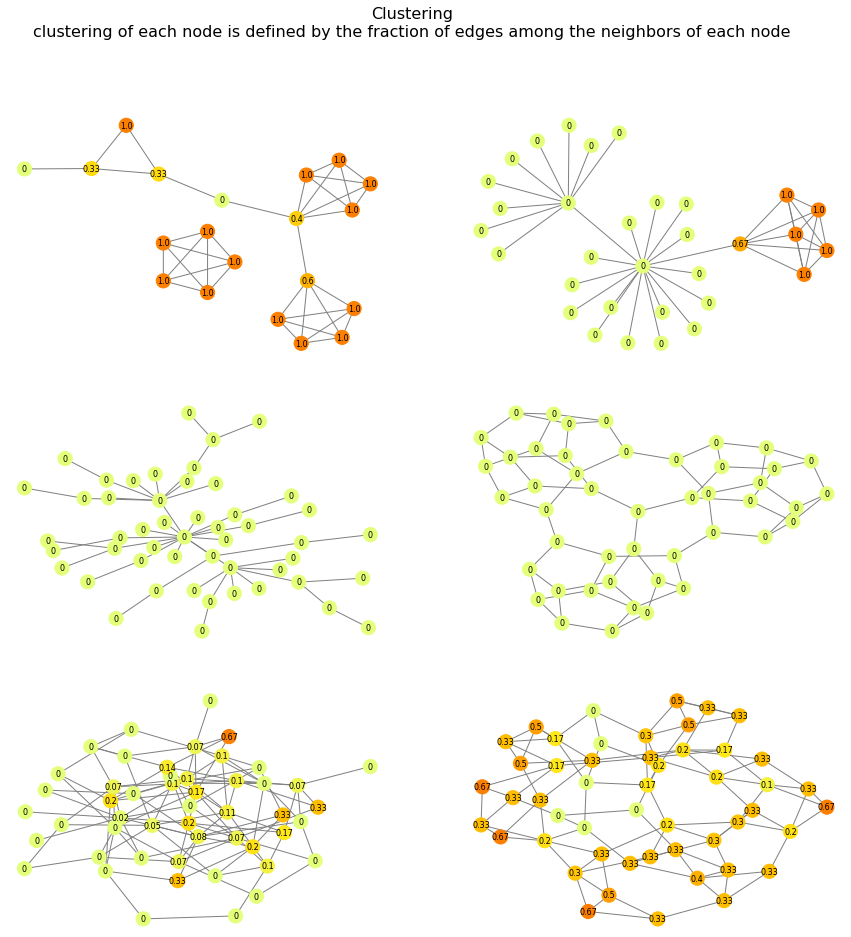

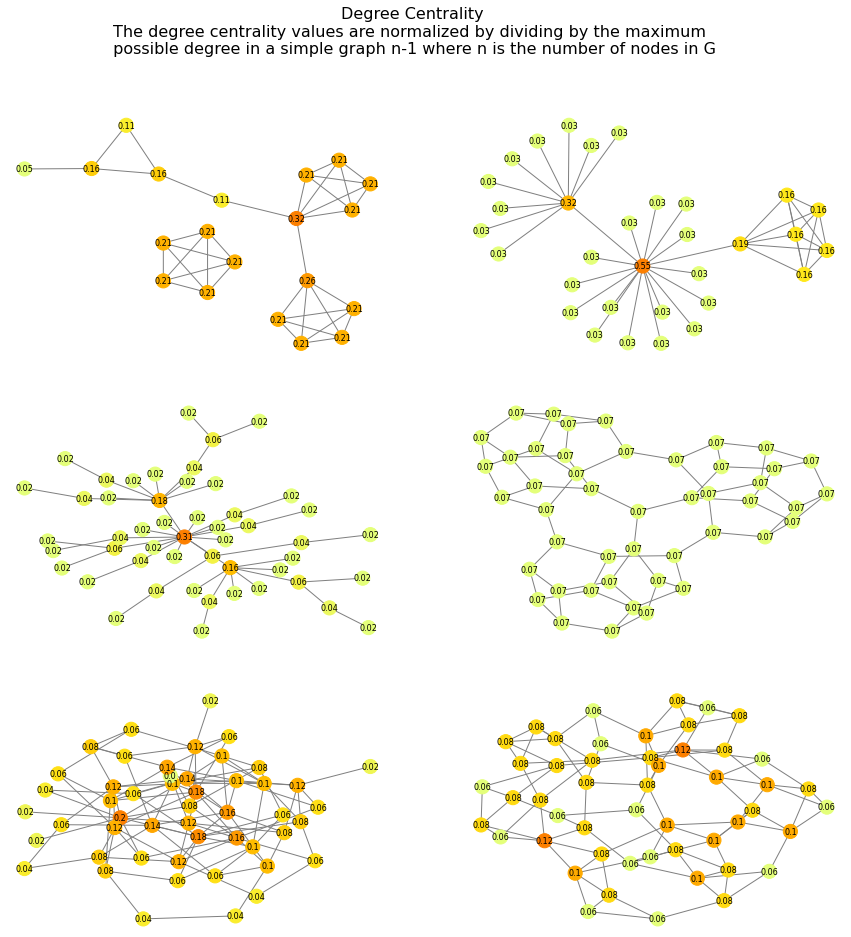

In [4]:
#Eigenvector
mapping={}
for net in visualNetworks:
    mapping[net] = nx.eigenvector_centrality(visualNetworks[net],max_iter=500)    
plotVisualMeasures(visualNetworks,mapping,"Eigenvector","Eigenvector centrality assigns a high score to nodes that have high degree and/or have neighbours with high degree")

#Katz
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.katz_centrality(visualNetworks[rede],max_iter=10000)    
plotVisualMeasures(visualNetworks, mapping,"Katz","In a connected network with a large, densely connected module, \n eigenvector centrality will assign high scores for nodes within the module and \n low (if not zero) scores for nodes outside the module")

#Pagerank
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.pagerank(visualNetworks[rede])    
plotVisualMeasures(
    visualNetworks, mapping,"Pagerank","With Eigenvector and Katz centrality, low degree nodes may receive a high score \n simply because they are connected to very high degree nodes, despite having low degree.")

#Closeness
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.closeness_centrality(visualNetworks[rede])
plotVisualMeasures(visualNetworks,mapping,"Closeness","Defines a node as central if it has a low average minimum path length to every other node \n in the network. It is assumed that nodes with a short average path length to other nodes can spread\n or receive information in a relatively short amount of time.")

#Information
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.information_centrality(visualNetworks[rede].subgraph(max(nx.connected_components(visualNetworks[rede]), key=len)))
plotVisualMeasures(visualNetworks,mapping,"Information_Centrality - Só funciona no LCC","Also sometimes referred to as current-flow closeness centrality, considers all possible paths that could exist between two nodes \n and the overlap between these paths, and weights them per the amount of information that path contains. ")

#Subgraph Centrality
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.subgraph_centrality(visualNetworks[rede])
plotVisualMeasures(visualNetworks,mapping,"Subgraph Centrality","Subgraph centrality also counts the number of walks, but instead of counting walks to other nodes, this method considers closed walks \n (i.e. walk that begin and end at the same node). Thus, subgraph centrality measures \n how many subgraphs, defined by closed walks, that node belongs to")

#Communicability betweenness centrality 
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.communicability_betweenness_centrality(visualNetworks[rede].subgraph(max(nx.connected_components(visualNetworks[rede]), key=len)))
plotVisualMeasures(visualNetworks, mapping,"Communicability betweenness centrality ", "Communicability betweenness considers the number of walks between every pair of nodes in which a given node participates")

#Betweenness
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.betweenness_centrality(visualNetworks[rede])    
plotVisualMeasures(visualNetworks,mapping,"Betweenness","Defines nodes as central if they lie on many shortest-paths between other pairs of nodes. \n The measure assumes that nodes with high betweenness act as putative information-processing bottlenecks in the network.")

#k-core
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.core_number(visualNetworks[rede])
plotVisualMeasures(visualNetworks,mapping,"K-CORE","k-core is a measure related to network decomposition in subgraphs, such that the resulting sugraph has a miniman degree equals to k ")

#Clustering
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.clustering(visualNetworks[rede])
plotVisualMeasures(visualNetworks,mapping,"Clustering","clustering of each node is defined by the fraction of edges among the neighbors of each node")


#degree_centrality
mapping={}
for rede in visualNetworks:
    mapping[rede] = nx.degree_centrality(visualNetworks[rede])
plotVisualMeasures(visualNetworks,mapping,"Degree Centrality","The degree centrality values are normalized by dividing by the maximum \n possible degree in a simple graph n-1 where n is the number of nodes in G")